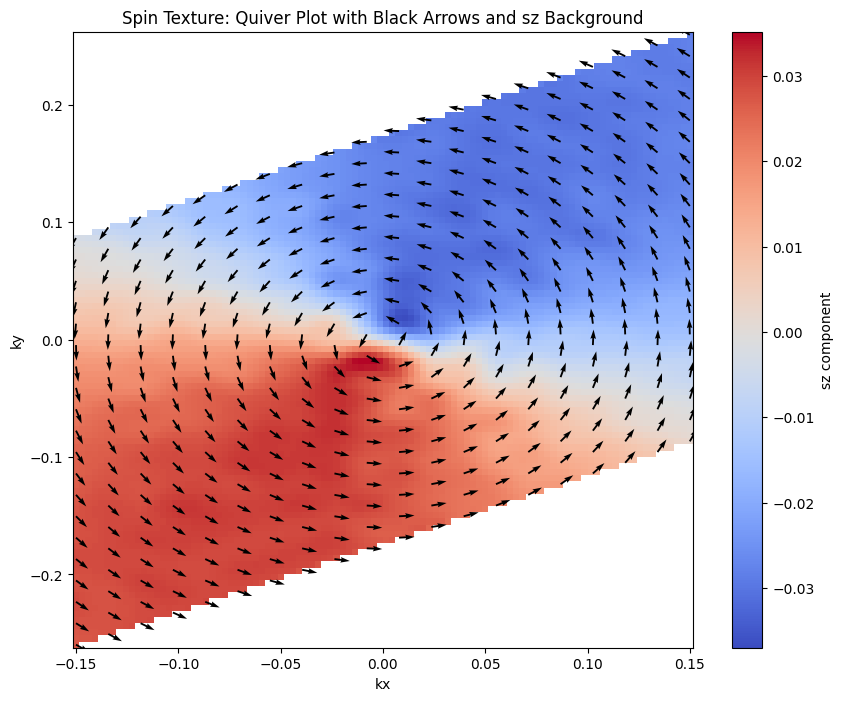

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the Excel file
file_path = 'spin_texture_cu_demo.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Convert the data to numpy arrays
kx = np.array(data['kx'])
ky = np.array(data['ky'])
sx = np.array(data['sx'])
sy = np.array(data['sy'])
sz = np.array(data['sz'])

# Create a grid for the continuous background
kx_unique = np.linspace(min(kx), max(kx), 100)
ky_unique = np.linspace(min(ky), max(ky), 100)
kx_grid, ky_grid = np.meshgrid(kx_unique, ky_unique)

# Interpolate sz values to fit the grid
sz_grid = griddata((kx, ky), sz, (kx_grid, ky_grid), method='cubic')

# Plot the continuous background for sz using pcolormesh
plt.figure(figsize=(10, 8))
plt.pcolormesh(kx_grid, ky_grid, sz_grid, shading='auto', cmap='coolwarm')
plt.colorbar(label='sz component')

# Overlay the quiver plot with black arrows
plt.quiver(kx, ky, sx, sy, color='black', scale=20, width=0.003)

# Setting labels and title
plt.xlabel('kx')
plt.ylabel('ky')
plt.title('Spin Texture: Quiver Plot with Black Arrows and sz Background')

plt.show()
